# Modul 2 Ekualisasi dan spesifikasi Histogram

## susunlah penglihatan adit berikut menjadi satu gambar utuh  

kode di bawah merupakan bagian dari pengimporan library yang digunakan pada program ini. Library NumPy digunakan untuk melakukan operasi matematika pada array, library Matplotlib digunakan untuk menampilkan gambar. library OpenCV digunakan untuk melakukan operasi pengolahan citra seperti konvolusi, filter, thresholding, dll , dan Library math adalah salah satu library bawaan dalam Python yang menyediakan fungsi-fungsi matematika yang lebih kompleks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2 as cv

kode di bawah ini membaca sebuah gambar dari file menggunakan fungsi imread dan menampilkan gambar tersebut menggunakan fungsi imshow dari pustaka matplotlib.

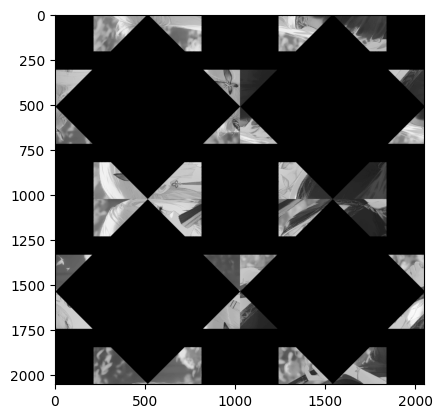

In [2]:
shenheacak = img.imread("senheScramble.jpg")
plt.imshow(shenheacak, cmap='gray')

In [3]:
def DivideImage(image):
    height, width = image.shape[:2]
    center_y = height // 2
    top_left = image[:center_y, :width//2]
    top_right = image[:center_y, width//2:]
    bottom_left = image[center_y:, :width//2]
    bottom_right = image[center_y:, width//2:]

    return top_left, top_right, bottom_left, bottom_right

def rotation(img, degree):
    hight, widht = img.shape[:2]
    rad = degree*(np.pi/180)
    rotate_img = np.zeros((hight, widht))

    xmid = hight // 2
    ymid = widht // 2

    for i in range(hight):
        for j in range(widht):
            x = int((i - xmid)*np.cos(rad) - (j - ymid)*np.sin(rad) + xmid)
            y = int((i - xmid)*np.sin(rad) + (j - ymid)*np.cos(rad) + xmid)
            if 0 <= x < hight and 0 <= y < widht :
                rotate_img[i, j] = img[x, y]
    return rotate_img

def translation(img, x, y):
    hight, widht = img.shape[:2]
    trans_img = np.zeros((hight, widht))
    for i in range(hight):
        for j in range(widht):
            tx = i + x
            ty = j + y
            if 0 <= tx < hight and 0 <= ty < widht:
                trans_img[tx, ty] = img[i, j]
    return trans_img

def removePadd(img):
    rows = np.any(img > 10, axis = 1)
    cols = np.any(img > 10, axis = 0)
    return img[rows][:, cols]

def translationdivided(img, x, y):
    height, width = img.shape[:2]
    trans_img = np.zeros((height, width), dtype=img.dtype)

    for i in range(height):
        for j in range(width // 2, width):
            tx = i + x
            ty = j - y
            if 0 <= tx < height and 0 <= ty < width:
                trans_img[tx, ty] = img[i, j]

    for i in range(height):
        for j in range(width // 2):
            tx = i + x
            ty = j + y
            if 0 <= tx < height and 0 <= ty < width:
                trans_img[tx, ty] = img[i, j]

    for i in range(height // 2, height):
        for j in range(width):
            tx = i - x
            ty = j + y
            if 0 <= tx < height and 0 <= ty < width:
                trans_img[tx, ty] = img[i, j]

    for i in range(height // 2):
        for j in range(width):
            tx = i + x
            ty = j + y
            if 0 <= tx < height and 0 <= ty < width:
                trans_img[tx, ty] = img[i, j]

    return trans_img

diatas merupakan setiap fungsi yang akan saya gunakan. fungsi yang akan gunakan adalah sebagai berikut:

Fungsi DivideImage(image): Fungsi ini digunakan untuk membagi gambar menjadi empat bagian yang sama ukurannya. Gambar dipecah menjadi bagian atas kiri, bagian atas kanan, bagian bawah kiri, dan bagian bawah kanan. Fungsi ini mengambil gambar sebagai argumen dan mengembalikan empat bagian gambar tersebut.

Fungsi rotation(img, degree): Fungsi ini digunakan untuk memutar gambar sebesar sudut tertentu (dalam derajat). Fungsi ini mengambil gambar dan sudut rotasi sebagai argumen. Gambar akan diputar sebesar sudut yang ditentukan searah jarum jam. Fungsi ini mengembalikan gambar yang sudah diputar.

Fungsi translation(img, x, y): Fungsi ini digunakan untuk melakukan translasi atau pergeseran gambar sejauh x piksel ke kanan dan y piksel ke bawah. Fungsi ini mengambil gambar, nilai x, dan nilai y sebagai argumen. Fungsi ini mengembalikan gambar yang sudah digeser.

Fungsi removePadd(img): Fungsi ini digunakan untuk menghapus area padding atau area kosong di sekitar gambar. Fungsi ini mengambil gambar sebagai argumen. Fungsi ini mengembalikan gambar tanpa area padding.

Fungsi translationdivided(img, x, y): Fungsi ini digunakan untuk melakukan translasi atau pergeseran gambar dengan pola tertentu. Pergeseran dilakukan dengan membagi gambar menjadi empat bagian dan menggeser setiap bagian sesuai dengan pola yang ditentukan. Fungsi ini mengambil gambar, nilai x, dan nilai y sebagai argumen. Fungsi ini mengembalikan gambar yang sudah digeser sesuai dengan pola yang ditentukan.

Kode dibawah ini digunakan untuk memutar gambar, membaginya menjadi empat , dan kemudian menampilkan setiap gambar secara terpisah.

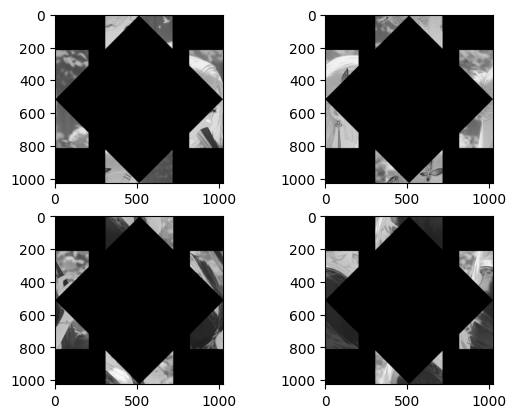

In [4]:
rotationImg = rotation(shenheacak, 90)

top_left, top_right, bottom_left, bottom_right = DivideImage(rotationImg)
plt.subplot(221), plt.imshow(top_left, cmap='gray')
plt.subplot(222), plt.imshow(top_right, cmap='gray')
plt.subplot(223), plt.imshow(bottom_left, cmap='gray')
plt.subplot(224), plt.imshow(bottom_right, cmap='gray')

plt.show()

Pertama, empat variabel top_left1, top_right1, bottom_left1, dan bottom_right1 diinisialisasi dengan memanggil fungsi translationdivided dengan argumen yang sesuai. Fungsi translationdivided mengambil citra sebagai argumen pertama dan melakukan operasi transformasi pada citra tersebut berdasarkan nilai x dan y yang diberikan. Hasil transformasi disimpan dalam variabel-variabel tersebut.

(<Axes: >, <matplotlib.image.AxesImage at 0x1efe1c7e6f0>)

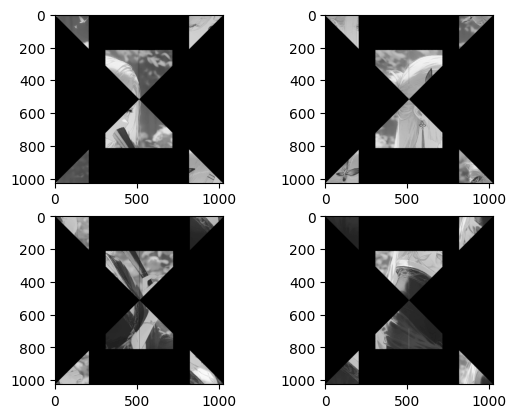

In [5]:
top_left1 = translationdivided(top_left, 0, 512)
top_right1 = translationdivided(top_right, 0, 512)
bottom_left1 = translationdivided(bottom_left, 0, 512)
bottom_right1 = translationdivided(bottom_right, 0, 512)
plt.subplot(221), plt.imshow(top_left1, cmap='gray')
plt.subplot(222), plt.imshow(top_right1, cmap='gray')
plt.subplot(223), plt.imshow(bottom_left1, cmap='gray')
plt.subplot(224), plt.imshow(bottom_right1, cmap='gray')


fungsi dibawah melakukan translasi terhadap gambar tersebut. Translasi dilakukan dengan menggeser setiap piksel gambar sejauh x dan y yang ditentukan Fungsi ini menghasilkan gambar baru yang telah ditranslasikan .Setelah itu, terdapat pemanggilan fungsi translation beberapa kali dengan argumen yang berbeda untuk menghasilkan gambar-gambar yang telah ditranslasikan. Hasil gambar-gambar tersebut disimpan dalam variabel ttl1, ttr1, btl1, dan btr1.

(<Axes: >, <matplotlib.image.AxesImage at 0x1efe861a990>)

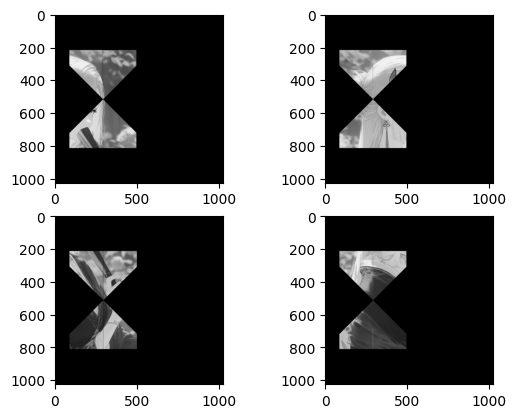

In [6]:
ttl1 = translation(top_left1, 0, 290)
ttl1 = translation(ttl1, 0, -510)
ttr1 = translation(top_right1, 0, 290)
ttr1 = translation(ttr1, 0, -510)
btl1 = translation(bottom_left1, 0, 290)
btl1 = translation(btl1, 0, -510)
btr1 = translation(bottom_right1, 0, 290)
btr1 = translation(btr1, 0, -510)

plt.subplot(221), plt.imshow(ttl1, cmap='gray')
plt.subplot(222), plt.imshow(ttr1, cmap='gray')
plt.subplot(223), plt.imshow(btl1, cmap='gray')
plt.subplot(224), plt.imshow(btr1, cmap='gray')


kode dibawah memanggil fungsi translationdivided pada empat gambar berbeda: top_left, top_right, bottom_left, dan bottom_right. Fungsi translasi terbagi melakukan translasi yang dibagi menjadi empat. Fungsi ini mengambil tiga argumen: sebuah gambar, dan dua bilangan bulat yang mewakili nilai terjemahan x dan y. Dalam hal ini, gambar di translasi sebesar 512 piksel ke arah x dan 0 piksel ke arah y. Gambar yang diubah kemudian disimpan dalam variabel baru: top_left2, top_right2, bottom_left2, dan bottom_right2


(<Axes: >, <matplotlib.image.AxesImage at 0x1efea106a50>)

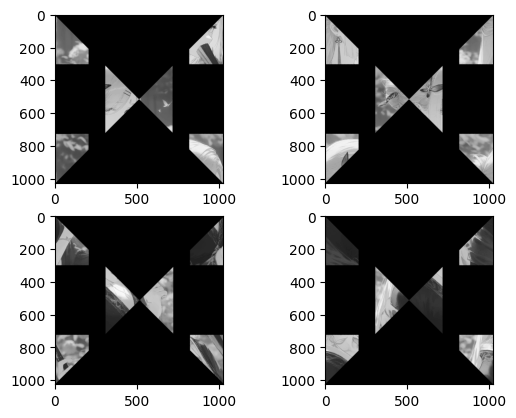

In [7]:
top_left2 = translationdivided(top_left, 512, 0)
top_right2 = translationdivided(top_right, 512, 0)
bottom_left2 = translationdivided(bottom_left, 512, 0)
bottom_right2 = translationdivided(bottom_right, 512, 0)
plt.subplot(221), plt.imshow(top_left2, cmap='gray')
plt.subplot(222), plt.imshow(top_right2, cmap='gray')
plt.subplot(223), plt.imshow(bottom_left2, cmap='gray')
plt.subplot(224), plt.imshow(bottom_right2, cmap='gray')


fungsi dibawah melakukan translasi terhadap gambar tersebut. Translasi dilakukan dengan menggeser setiap piksel gambar sejauh x dan y yang ditentukan Fungsi ini menghasilkan gambar baru yang telah ditranslasikan .Setelah itu, terdapat pemanggilan fungsi translation beberapa kali dengan argumen yang berbeda untuk menghasilkan gambar-gambar yang telah ditranslasikan. Hasil gambar-gambar tersebut disimpan dalam variabel ttl2, ttr2, btl2, dan btr2.

(<Axes: >, <matplotlib.image.AxesImage at 0x1efe1a99e80>)

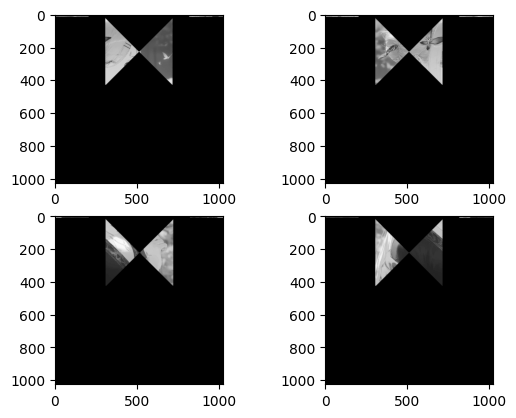

In [8]:
ttl2 = translation(top_left2, 310, 0)
ttl2 = translation(ttl2, -600, 0)
ttr2 = translation(top_right2, 310, 0)
ttr2 = translation(ttr2, -600, 0)
btl2 = translation(bottom_left2, 310, 0)
btl2 = translation(btl2, -600, 0)
btr2 = translation(bottom_right2, 310, 0)
btr2 = translation(btr2, -600, 0)

plt.subplot(221), plt.imshow(ttl2, cmap='gray')
plt.subplot(222), plt.imshow(ttr2, cmap='gray')
plt.subplot(223), plt.imshow(btl2, cmap='gray')
plt.subplot(224), plt.imshow(btr2, cmap='gray')


Kode ini melakukan transformasi gambar pada empat gambar berbeda: ttl1, ttl2, ttr1, ttr2, btl1, btl2, btr1, dan btr2. Transformasi ini meliputi rotasi dan translasi.

Pertama, kode ini menerapkan rotasi 45 derajat ke setiap gambar menggunakan fungsi rotation. Fungsi ini mengambil gambar dan derajat sebagai masukan, dan mengembalikan gambar baru yang diputar berdasarkan derajat yang ditentukan.

Selanjutnya, kode tersebut menerapkan translasi ke gambar kedua yang diputar dari setiap pasangan. lalu melakukan translasi translasi x dan y, dan mengembalikan gambar baru yang digeser oleh jarak tersebut.

Setelah transformasi, dua gambar dari masing-masing pasangan dijumlahkan untuk membuat gambar baru. Hal ini dilakukan dengan menggunakan operator +, yang  melakukan penambahan nilai piksel berdasarkan elemen pada dua gambar.

(<Axes: >, <matplotlib.image.AxesImage at 0x1efe8698a40>)

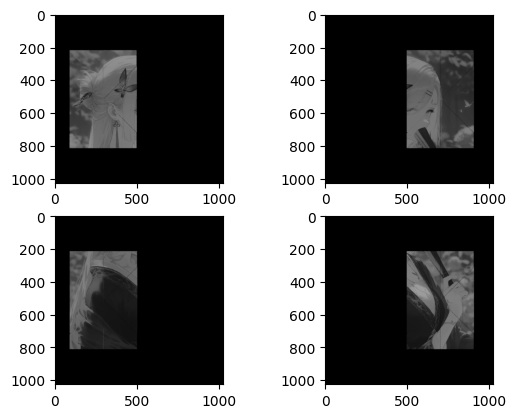

In [9]:
rotateTop_left1 = rotation(ttl1, 45)
rotateTop_left2 = rotation(ttl2, 45)
rotateTop_left2 = translation(rotateTop_left2, 50, -360)
ttl = rotateTop_left1 + rotateTop_left2
ttl = rotation(ttl, -45)
ttl = translation(ttl,0,410)

rotateTop_right1 = rotation(ttr1, 45)
rotateTop_right2 = rotation(ttr2, 45)
rotateTop_right2 = translation(rotateTop_right2, 50, -360)
ttr = rotateTop_right1 + rotateTop_right2
ttr = rotation(ttr, -45)

rotateBottom_left1 = rotation(btl1, 45)
rotateBottom_left2 = rotation(btl2, 45)
rotateBottom_left2 = translation(rotateBottom_left2, 50, -360)
btl = rotateBottom_left1 + rotateBottom_left2
btl = rotation(btl, -45)
btl = translation(btl,0,410)

rotateBottom_right1 = rotation(btr1, 45)
rotateBottom_right2 = rotation(btr2, 45)
rotateBottom_right2 = translation(rotateBottom_right2, 50, -360)
btr = rotateBottom_right1 + rotateBottom_right2
btr = rotation(btr, -45)

plt.subplot(221) ,plt.imshow(ttr, cmap='gray')
plt.subplot(222) ,plt.imshow(ttl, cmap='gray')
plt.subplot(223) ,plt.imshow(btr, cmap='gray')
plt.subplot(224) ,plt.imshow(btl, cmap='gray')


pada kode ini variabel atas dan bawah diinisialisasi dengan hasil penjumlahan ttl dan ttr untuk atas, serta btl dan btr untuk bawah.
Lalu fungsi removePadd dipanggil untuk menghapus padding pada gambar atas dan bawah. Fungsi ini menerima parameter img yang merupakan gambar dalam bentuk array. Pada fungsi ini, dilakukan operasi untuk menghapus baris dan kolom yang memiliki nilai piksel lebih besar dari 10. Hasilnya adalah gambar tanpa padding.
Fungsi removePadd mengembalikan gambar tanpa padding, kemudian hasilnya disimpan kembali ke variabel atas dan bawah.

(<Axes: >, <matplotlib.image.AxesImage at 0x1efe86b5d30>)

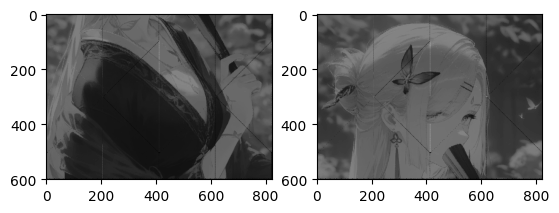

In [10]:
atas = ttl + ttr
bawah  = btl + btr
atas = removePadd(atas)
bawah = removePadd(bawah)

plt.subplot(221) ,plt.imshow(bawah, cmap='gray')
plt.subplot(222) ,plt.imshow(atas, cmap='gray')

Pada kode ini terdapat pemanggilan fungsi np.resize(atas, (bawah.shape[0], bawah.shape[1])). Fungsi ini digunakan untuk mengubah ukuran array atas menjadi sesuai dengan ukuran array bawah. Fungsi ini akan menghasilkan array baru dengan ukuran yang ditentukan, dan jika ukuran baru lebih besar dari ukuran array asli, maka array baru akan diisi dengan salinan berulang dari array asli. Selanjutnya, hasil dari pemanggilan fungsi np.resize tersebut disimpan dalam variabel atas. Kemudian, dilakukan penggabungan antara array atas dan array bawah menggunakan fungsi np.vstack((atas, bawah)). Fungsi ini akan menggabungkan kedua array secara vertikal (baris demi baris) menjadi array baru. setelah itu menyimpan hasil penggabungan gambar di folder res.

True

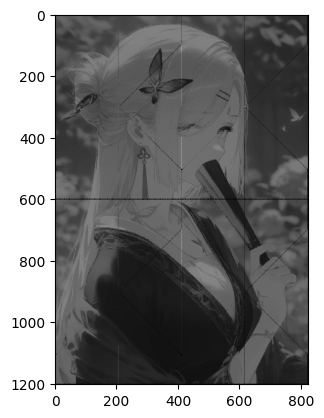

In [11]:
atas = np.resize(atas, (bawah.shape[0], bawah.shape[1]))

shenheasli = np.vstack((atas, bawah))

plt.imshow(shenheasli, cmap='gray')
cv.imwrite('shenhe asli.jpg', shenheasli)

## Ekualisasi Citra Shenhe dan Menampilkan Histogram Perbandingannya 

kode di bawah ini membaca sebuah gambar dari file menggunakan fungsi imread dan menampilkan gambar tersebut menggunakan fungsi imshow dari pustaka matplotlib.

In [12]:
shenhe = plt.imread('shenhe asli.jpg')
kurumi = plt.imread('kurumi.jpg')
megumin = plt.imread('megumin.jpg')

fungsi dibawah mengambil nilai tinggi dan lebar pixel dari citra, lalu membuat array kosong untuk menyimpan setiap nilai gray, setelah itu 	melakukan perulangan untuk mengscan dari setiap pixel untuk menghitung distribusi grayscalenya.

In [13]:
def intensitasDerajatCitra(image):
	tinggi,lebar = image.shape
	jumlahPerGray = np.zeros(256).astype(int)
	for i in range(tinggi):
		for j in range(lebar):
			jumlahPerGray[image[i, j]]+=1

	return jumlahPerGray

kode dibawah ini membuat index untuk semua grayscale dari 0-255, lalu menampilkan histogram dalam bentuk probabilitas per grayscale


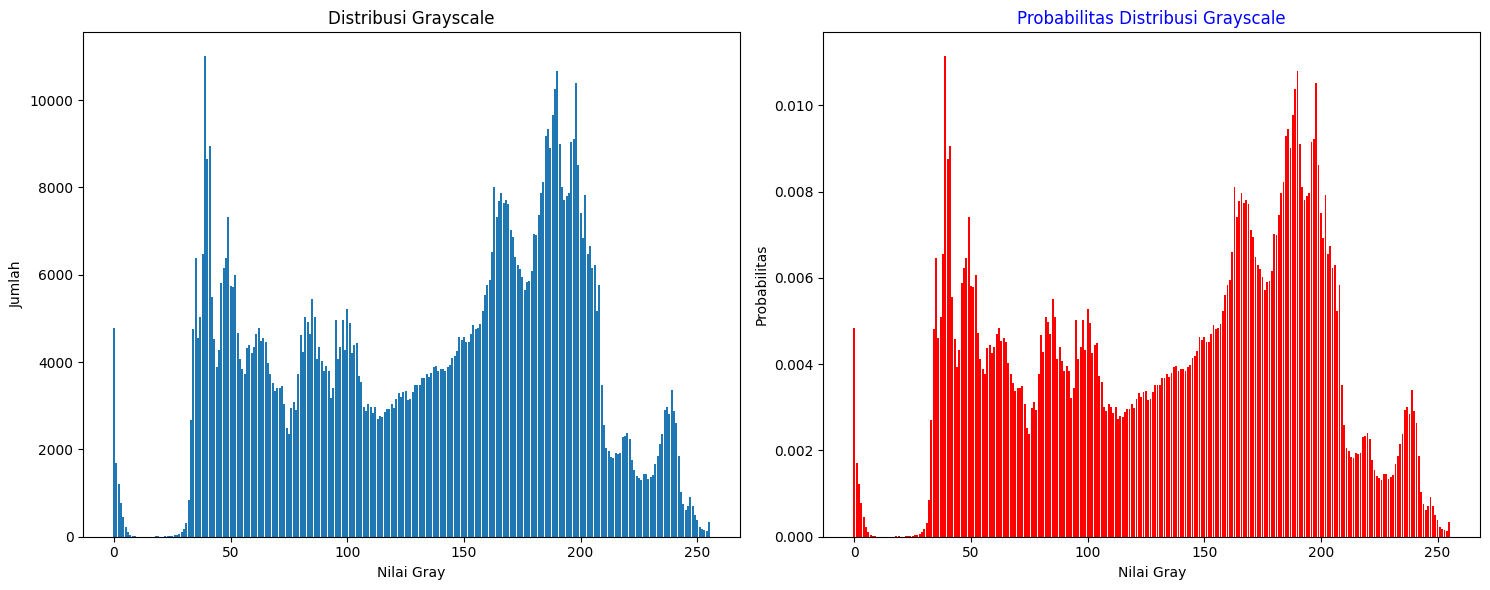

In [14]:
grayValue = [i for i in range(256)]
intensitasDerajatShenhe = intensitasDerajatCitra(shenhe)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].set_title('Distribusi Grayscale')
axs[0].set_xlabel('Nilai Gray')
axs[0].set_ylabel('Jumlah')
axs[0].bar(grayValue, intensitasDerajatShenhe)

axs[1].set_title('Probabilitas Distribusi Grayscale', color='blue')
axs[1].set_xlabel('Nilai Gray')
axs[1].set_ylabel('Probabilitas')
axs[1].bar(grayValue, intensitasDerajatShenhe / intensitasDerajatShenhe.sum(), color='red')

plt.tight_layout()
plt.show()

fungsi dibawah ini membuat sebuah array kosong untuk setiap nilai pixel hasil ekualisasi, lalu 	menghitung dan menyimpan hasil jumlah setiap distribusi kumulatif untuk setiap nilai intensitas piksel dan 	menyimpan hasil normalisasi dari tranformasi dengan rumus normalisasi = (cdf*(L-1)))/(tinggi*lebar) L = bit level



In [15]:
def findTarget(intensitasDerajat, image):
	tinggi, lebar = image.shape
	distKumulatif = np.zeros(256).astype(float)
	for i in range(256):
		distKumulatif[i] = np.sum(intensitasDerajat[0:i+1])

	normalisasiDistCum = (distKumulatif*255)/(tinggi*lebar)
	normalisasiDistCum = np.round(normalisasiDistCum).astype(int)

	return normalisasiDistCum

Pertama, fungsi findTarget dipanggil dengan argumen intensitasDerajatShenhe dan shenhe. Fungsi ini menghitung distribusi kumulatif normalisasi dari intensitas derajat citra. Hasilnya disimpan dalam variabel normalisasiTargetShenhe.
Selanjutnya, kode ini membuat gambar baru yang disebut ekualisasiShenhe dengan ukuran yang sama seperti shenhe dan mengisi semua pikselnya dengan 0. Kemudian, kode ini melakukan iterasi melalui setiap piksel di shenhe dan mengubah nilai piksel yang sesuai di ekualisasiShenhe menjadi nilai yang sesuai dari normalisasiTargetShenhe. Ini efektif melakukan ekualisasi histogram pada gambar.

(-0.5, 821.5, 1201.5, -0.5)

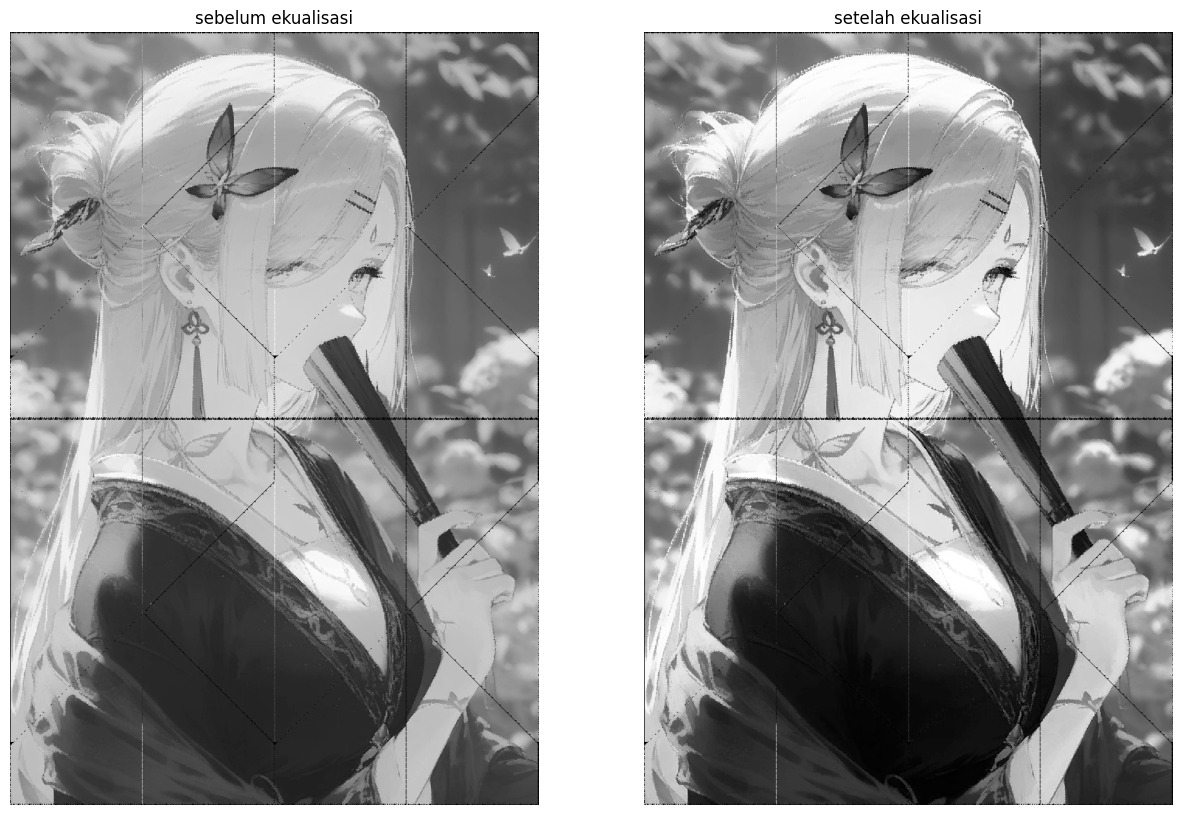

In [16]:
normalisasiTargetShenhe = findTarget(intensitasDerajatShenhe, shenhe)

tinggi, lebar = shenhe.shape
ekualisasiShenhe = np.zeros((tinggi, lebar)).astype(np.uint8)
for i in range(tinggi):
	for j in range(lebar):
		ekualisasiShenhe[i,j] = normalisasiTargetShenhe[shenhe[i,j]]

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(shenhe, cmap='gray')
plt.title('sebelum ekualisasi')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ekualisasiShenhe , cmap='gray')
plt.title('setelah ekualisasi')
plt.axis('off')

 Fungsi ini mengambil citra sebagai input dan menghitung distribusi grayscale dari citra tersebut. Distribusi grayscale ini dihitung dengan mengiterasi setiap piksel pada citra dan menghitung jumlah kemunculan setiap nilai grayscale (0-255). Hasilnya adalah array jumlahPerGray yang berisi jumlah kemunculan setiap nilai grayscale.

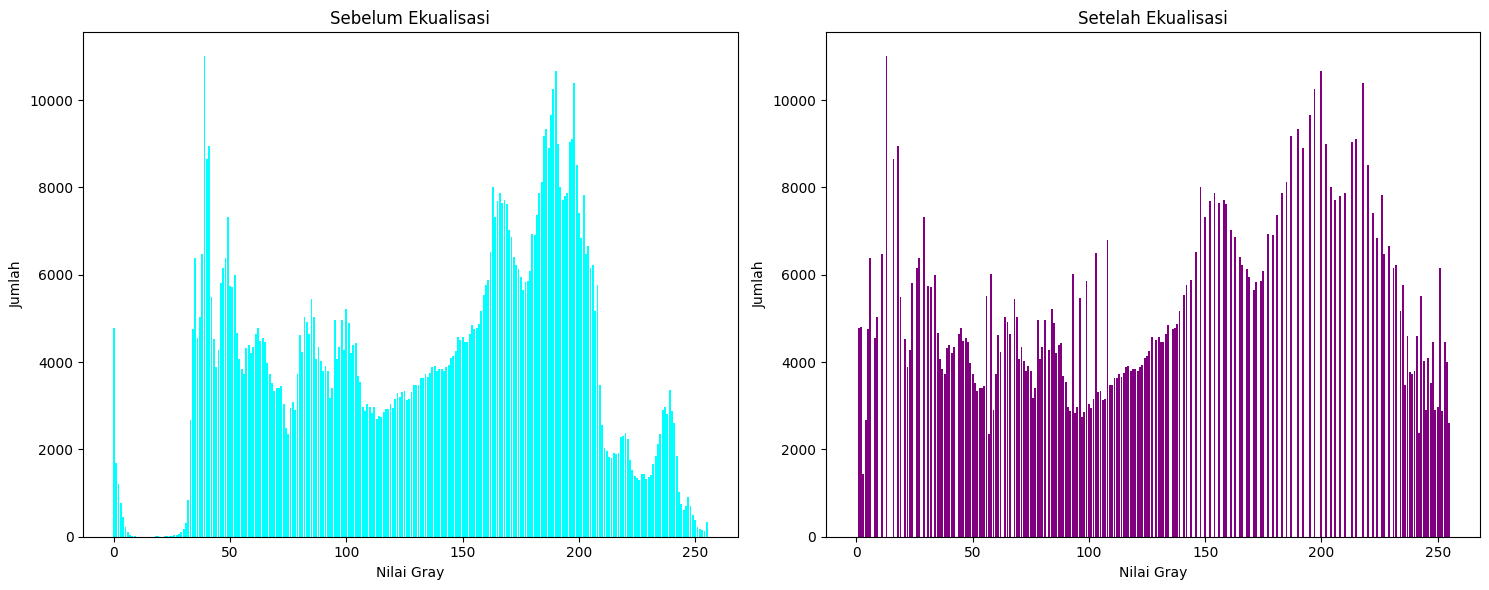

In [17]:
intensitasDerajatShenheEkual = intensitasDerajatCitra(ekualisasiShenhe)

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].set_title('Sebelum Ekualisasi')
axs[0].set_xlabel('Nilai Gray')
axs[0].set_ylabel('Jumlah')
axs[0].bar(grayValue, intensitasDerajatShenhe, color='cyan')

axs[1].set_title('Setelah Ekualisasi')
axs[1].set_xlabel('Nilai Gray')
axs[1].set_ylabel('Jumlah')
axs[1].bar(grayValue, intensitasDerajatShenheEkual, color='purple')

plt.tight_layout()
plt.show()

## Melakukan spesifikasi Histogram Shenhe dengan Target Histogram Kurumi dan Megumin

membuat fungsi yang dapat mengubah citra menjadi gray image

In [18]:
def rgb2gray(image):
    tinggi, lebar = image.shape[:2]
    grayImg = np.zeros((tinggi, lebar)).astype(np.uint8)
    for i in range(tinggi):
        for j in range(lebar):
            grayImg[i,j] = int(0.2989*image[i][j][0] + 0.5870*image[i][j][1] + 0.1140*image[i][j][2])
            
    return grayImg

kdoe dibawah mengubah citra kurumi dan megumin menjadi citra grayscale

In [19]:
kurumiGray = rgb2gray(kurumi)
meguminGray = rgb2gray(megumin)

kode dibawah mencari setiap intensitas derajat tiap pixel pada citra megumin dan kurumi

In [20]:
intensitasDerajatKurumi = intensitasDerajatCitra(kurumiGray)
intensitasDerajatMegumin = intensitasDerajatCitra(meguminGray)

kode dibawah menyimpan hasil normalisasi distribusi kumulatif dari setiap intensitas derajat pixel pada citra megumin dan kurumi

In [21]:
normalisasiTargetKurumi = findTarget(intensitasDerajatKurumi, kurumiGray)
normalisasiTargetMegumin = findTarget(intensitasDerajatMegumin, meguminGray)

fungsi dibawah ini Mencari Index dengan Target yang Memiliki Selisih Terkecil dengan cara membuat nilai awal minimum sebagai acuan lalu menyimpan nilai minimum baru dan menyimpan index dari target.

In [22]:
def findMinimumTarget(normalisasiCitraOriginal, normalisasiCitraTarget):
    minAtIndex = np.zeros(256).astype(int)
    for i in range(255):
        min=256
        for j in range(255):
            newMin=abs(normalisasiCitraOriginal[i]-normalisasiCitraTarget[j])
			
            if min>newMin:
                min=newMin
                minAtIndex[i]=j

    return minAtIndex


kode dibawah ini Mencari Index dengan Target megumin dan kurumi yang Memiliki Selisih Terkecil dengan cara membuat nilai awal minimum sebagai acuan lalu menyimpan nilai minimum baru dan menyimpan index dari target.

In [23]:
minKurumiAtIndex = findMinimumTarget(normalisasiTargetShenhe, normalisasiTargetKurumi)
minMeguminAtIndex = findMinimumTarget(normalisasiTargetShenhe, normalisasiTargetMegumin)

kode dibawah ini memetakan kembali citra shenhe dengan menggunakan index yang telah didapat dengan cara mencari nilai intensitas derajat pixel pada citra shenhe yang sesuai dengan index yang telah didapat pada citra megumin dan kurumi

(-0.5, 821.5, 1201.5, -0.5)

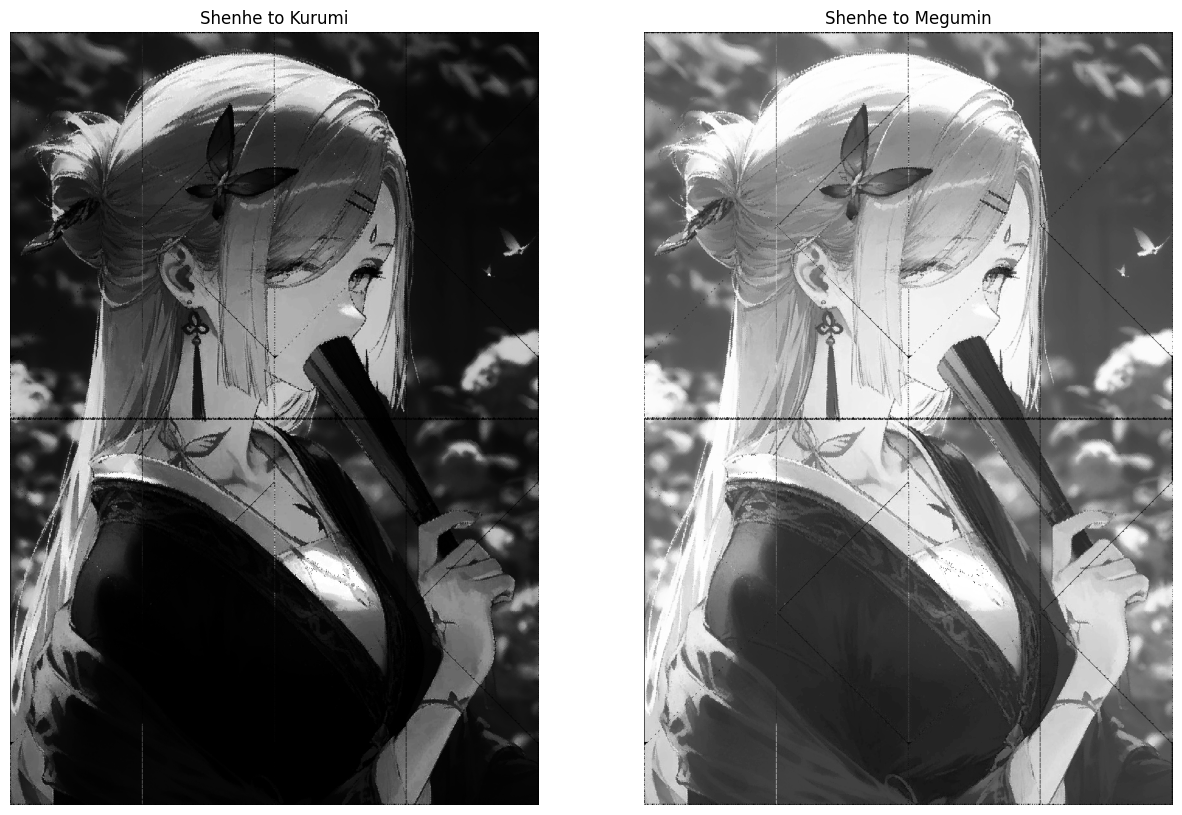

In [24]:
spesifikasiShenhe2Kurumi = np.zeros(shenhe.shape).astype(int)
spesifikasiShenhe2Megumin = np.zeros(shenhe.shape).astype(int)

for i in range(tinggi):
    for j in range(lebar):
        spesifikasiShenhe2Kurumi[i,j]=minKurumiAtIndex[shenhe[i,j]]
        spesifikasiShenhe2Megumin[i,j]=minMeguminAtIndex[shenhe[i,j]]

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(spesifikasiShenhe2Kurumi, cmap='gray')
plt.title('Shenhe to Kurumi')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(spesifikasiShenhe2Megumin, cmap='gray')
plt.title('Shenhe to Megumin')
plt.axis('off')


mencari nilai rata rata per mxn bagian pada citra shenhe, kemudian jika hasil rata rata tersebut lebih besar dari 128 maka nilai pixel tersebut akan akan dispesifikasi dengan citra kurumi jika tidak maka akan dispesifikasi dengan citra megumin

In [25]:
def splitImage(image, M=1, N=1):
	tinggi, lebar = image.shape[:2]
	bagianTinggi = tinggi // M
	bagianLebar = lebar // N
	bagianCitra = []
	for i in range(M):
		for j in range(N):
			bagian = image[i*bagianTinggi:(i+1)*bagianTinggi, j*bagianLebar:(j+1)*bagianLebar]
			bagianCitra.append(bagian)
	return bagianCitra

membuat fungsi untuk menggabung citra M x N bagian menjadi citra utuh


In [26]:
def mergeImage(images, M=1, N=1):
	bagianTinggi, bagianLebar = images[0].shape[:2]
	tinggi = bagianTinggi * M
	lebar = bagianLebar * N
	image = np.zeros((tinggi, lebar)).astype(np.uint8)
	for i in range(M):
		for j in range(N):
			image[i*bagianTinggi:(i+1)*bagianTinggi, j*bagianLebar:(j+1)*bagianLebar] = images[i*N+j]
	return image


Fungsi ini bertujuan untuk menghitung nilai rata-rata dari seluruh piksel dalam citra.

In [27]:
def citraMean(image):
    tinggi, lebar = image.shape[:2]
    hasil = 0
    for i in range(tinggi):
        for j in range(lebar):
            hasil += image[i, j]
    
    return hasil/(tinggi*lebar)

Fungsi specPecahan(images) menerima parameter images yang merupakan daftar gambar. Fungsi ini akan menghasilkan daftar spesifikasi pecahan untuk setiap gambar yang diberikan.

In [28]:
def specPecahan(images):
	listSpec = []

	for i in images:
		if np.mean(i) <= 128:
			tinggi, lebar = i.shape[:2]
			spesifikasiPecahan = np.zeros((tinggi, lebar)).astype(int)

			intensitasDerajatPecahan = intensitasDerajatCitra(i)
			normalisasiTargetPecahan = findTarget(intensitasDerajatPecahan, i)
			minKurumiAtIndex = findMinimumTarget(normalisasiTargetPecahan, normalisasiTargetKurumi)

			for y in range(tinggi):
				for x in range(lebar):
					spesifikasiPecahan[y, x] = minKurumiAtIndex[i[y, x]]
			
			listSpec.append(spesifikasiPecahan)
		else:
			tinggi, lebar = i.shape[:2]
			spesifikasiPecahan = np.zeros((tinggi, lebar)).astype(int)
			
			intensitasDerajatPecahan = intensitasDerajatCitra(i)
			normalisasiTargetPecahan = findTarget(intensitasDerajatPecahan, i)
			minMeguminAtIndex = findMinimumTarget(normalisasiTargetPecahan, normalisasiTargetMegumin)

			for y in range(tinggi):
				for x in range(lebar):
					spesifikasiPecahan[y, x] = minMeguminAtIndex[i[y, x]]
			
			listSpec.append(spesifikasiPecahan)
	
	return listSpec

kode ini memecah citra shenhe itu menjadi beberapa kombinasi dan berdasarkan kondisi tertentu pecahan tersebut akan 
di spesifikasi terhadap citra megumin atau kurumi 

(-0.5, 815.5, 1199.5, -0.5)

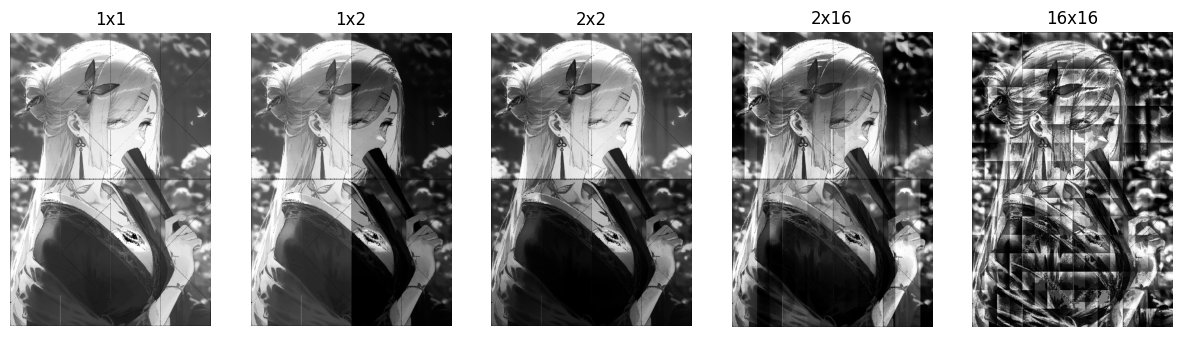

In [29]:
citraPecahan = splitImage(ekualisasiShenhe)
listSpec = specPecahan(citraPecahan)
citraHasil1x1 = mergeImage(listSpec)

citraPecahan = splitImage(ekualisasiShenhe,1,2)
listSpec = specPecahan(citraPecahan)
citraHasil1x2 = mergeImage(listSpec,1,2)

citraPecahan = splitImage(ekualisasiShenhe,2,2)
listSpec = specPecahan(citraPecahan)
citraHasil2x2 = mergeImage(listSpec,2,2)

citraPecahan = splitImage(ekualisasiShenhe,2,16)
listSpec = specPecahan(citraPecahan)
citraHasil2x16 = mergeImage(listSpec,2,16)

citraPecahan = splitImage(ekualisasiShenhe,16,16)
listSpec = specPecahan(citraPecahan)
citraHasil16x16 = mergeImage(listSpec,16,16)

plt.figure(figsize=(15, 15))
plt.subplot(1, 5, 1)
plt.title('1x1')
plt.imshow(citraHasil1x1, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 2)
plt.title('1x2')
plt.imshow(citraHasil1x2, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 3)
plt.title('2x2')
plt.imshow(citraHasil2x2, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 4)
plt.title('2x16')
plt.imshow(citraHasil2x16, cmap='gray')
plt.axis('off')
plt.subplot(1, 5, 5)
plt.title('16x16')
plt.imshow(citraHasil16x16, cmap='gray')
plt.axis('off')